In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

# Load the data

In [2]:

train_data = pd.read_csv('/kaggle/input/playground-series-s3e24/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')

# Split features and target variable

In [3]:

X = train_data.drop(['id', 'smoking'], axis=1)
y = train_data['smoking']

# Split the training data into train and validation sets

In [4]:

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a Gradient Boosting Classifier model

In [5]:

model = GradientBoostingClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

# Make predictions on the validation set

In [6]:

valid_preds = model.predict_proba(X_valid)[:, 1]

# Calculate AUROC on the validation set

In [7]:

auroc = roc_auc_score(y_valid, valid_preds)
print("AUROC on validation set:", auroc)

AUROC on validation set: 0.8596612908980795


# Make predictions on the test set

In [8]:

test_preds = model.predict_proba(test_data.drop('id', axis=1))[:, 1]

# Prepare submission file

In [9]:

submission_df = pd.DataFrame({'id': test_data['id'], 'smoking': test_preds})

# Save submission file

In [10]:

submission_df.to_csv('submission.csv', index=False)

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, accuracy_score

# Plot ROC curve

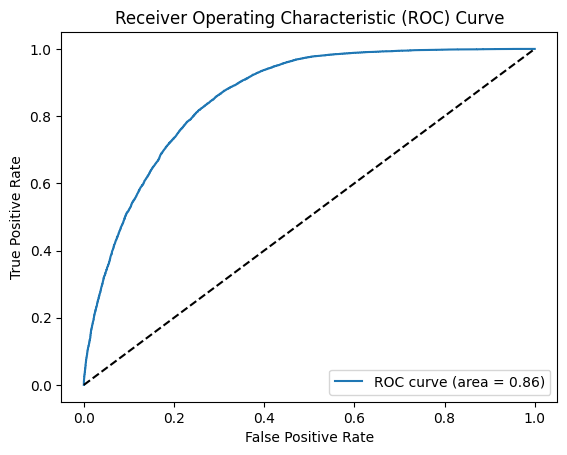

In [12]:

fpr, tpr, thresholds = roc_curve(y_valid, valid_preds)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate accuracy

In [13]:

valid_preds_binary = (valid_preds > 0.5).astype(int)
accuracy = accuracy_score(y_valid, valid_preds_binary)
print("Accuracy:", accuracy)

Accuracy: 0.7771254552304407
